# 5.3 Interpolation with polynoms
Find the polynom $P(x)$ that goes through the four points $(1,3),(3,3),(4,0),(5,11)$, and calcaulate the value of $P(7)$.

Find the polynom $Q(x)$ that goes additionally through point $(7,6)$. How much changes the coefficient of the highest degree term in $Q(x)$ if the y-value at $x=7$ is changed by one unit?

Write a program that sketches the polynom $Q(x)$. It is easier to use Lagrange interpolation in this case.

In [1]:
%run ../../tools/projini.py

from math import *
%matplotlib inline
from numpy import *
import matplotlib.pylab as pyl

In [2]:
# Given quantities
x = array([float('nan'), 1., 3., 4., 5., 7.])   #point coordinates, one dummy element
y = array([float('nan'), 3., 3., 0., 11., 6.])  # in order to get one-based index

NP = 4  # number of points for P(x)
NQ = 5  # number of points for Q(x)

x_test = 7.   # P(x_test) searched

## Calculation of P(x)
    x_1 | f[1]
                 f[1 2]
    x_2 | f[2]            f[1 2 3]
                 f[2 3]              f[1 2 3 4]
    x_3 | f[3]            f[2 3 4]
                 f[3 4]
    x_4 | f[4]
* * *
    f[1] = y_1
    f[2] = y_2
    f[3] = y_3
    f[4] = y_4

    f[1 2] = (f[2] - f[1])/(x_2 - x_1)
    f[2 3] = (f[3] - f[2])/(x_3 - x_2)
    f[3 4] = (f[4] - f[3])/(x_4 - x_3)

    f[1 2 3] = (f[2 3] - f[1 2])/(x_3 - x_1)
    f[2 3 4] = (f[2 3] - f[3 4])/(x_4 - x_2)

    f[1 2 3 4] = (f[2 3 4]-f[1 2 3])/(x_4-x_1)
* * *
The polynom is defined as
$$\begin{align*}
P(x) & =\sum_{i=1}^n f[x_1 \ldots x_i](x-x_1) \ldots (x-x_{i-1}) \\
     & = f[1] + f[1\,2](x-x_1) + f[1\,2\,3](x-x_1)(x-x_2) + f[1\,2\,3\,4](x-x_1)(x-x_2)(x-x_3)
\end{align*}$$

In [3]:
f_1=y[1]; f_2=y[2]; f_3=y[3]; f_4=y[4]

f_1_2 = (f_2 - f_1)/(x[2] - x[1])
f_2_3 = (f_3 - f_2)/(x[3] - x[2])
f_3_4 = (f_4 - f_3)/(x[4] - x[3])

f_1_2_3 = (f_2_3 - f_1_2)/(x[3] - x[1])
f_2_3_4 = (f_3_4 - f_2_3)/(x[4] - x[2])

f_1_2_3_4 = (f_2_3_4 - f_1_2_3)/(x[4] - x[1])

In [4]:
# Equation of the polynom P(x)
P_x = lambda xi: f_1 \
                 + f_1_2    *(xi - x[1]) \
                 + f_1_2_3  *(xi - x[1])*(xi - x[2]) \
                 + f_1_2_3_4*(xi - x[1])*(xi - x[2])*(xi - x[3])

print ("P(x) = (%.2f) + (%.2f)(x−%.0f) + (%.2f)(x−%.0f)(x−%.0f) "
       + "+ (%.2f)(x−%.0f)(x−%.0f)(x−%.0f)") % \
               (f_1,f_1_2,x[1],f_1_2_3,x[1],x[2],f_1_2_3_4,x[1],x[2],x[3])

P(x) = (3.00) + (0.00)(x−1) + (-1.00)(x−1)(x−3) + (2.00)(x−1)(x−3)(x−4)


In [5]:
# Interpolated point at x = 7
print "Interpolated value at x = %.0f: P(%.0f) = %f" % (x_test, x_test, P_x(x_test))

Interpolated value at x = 7: P(7) = 123.000000


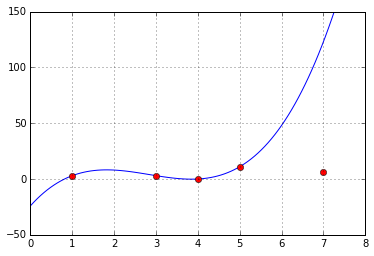

In [6]:
x_pl = linspace(0,8,101)
y_pl = P_x(x_pl)
pyl.figure()
pyl.plot(x_pl,y_pl,x[1:6],y[1:6],'ro')
pyl.ylim(-50,150)
pyl.grid()

## Calculation of Q(x)
We use also the point $P_5 = (x_5, y_5)$. 
    x_1 | f[1]
                 f[1 2]
    x_2 | f[2]            f[1 2 3]
                 f[2 3]              f[1 2 3 4]
    x_3 | f[3]            f[2 3 4]                f[1 2 3 4 5]
                 f[3 4]              f[2 3 4 5]
    x_4 | f[4]            f[3 4 5]
                 f[4 5]
    x_5 | f[5]
* * *
    f[5] = y_5

    f[4 5] = (f[5] - f[4])/(x_5 - x_4)

    f[3 4 5] = (f[4 5] - f[3 4])/(x_5 - x_3)

    f[2 3 4 5] = (f[3 4 5] - f[2 3 4])/(x_5 - x_2)
    
    f[1 2 3 4 5] = (f[2 3 4 5] - f[1 2 3 4])/(x_5 - x_1)    
* * *
The polynom is defined as
$$\begin{align*}
P(x) & =\sum_{i=1}^n f[x_1 \ldots x_i](x-x_1) \ldots (x-x_{i-1}) \\
     & = f[1] + f[1\,2](x-x_1) + f[1\,2\,3](x-x_1)(x-x_2) + f[1\,2\,3\,4](x-x_1)(x-x_2)(x-x_3) + f[1\,2\,3\,4\,5](x-x_1)(x-x_2)(x-x_3)(x-x_4)
\end{align*}$$

In [7]:
f_5 = y[5]

f_4_5 = (f_5 - f_4)/(x[5] - x[4])

f_3_4_5 = (f_4_5 - f_3_4)/(x[5] - x[3])

f_2_3_4_5 = (f_3_4_5 - f_2_3_4)/(x[5] - x[2])

f_1_2_3_4_5 = (f_2_3_4_5 - f_1_2_3_4)/(x[5] - x[1])

In [8]:
# Equation of the polynom Q(x)
Q_x = lambda xi: f_1 \
                 + f_1_2      *(xi - x[1]) \
                 + f_1_2_3    *(xi - x[1])*(xi - x[2]) \
                 + f_1_2_3_4  *(xi - x[1])*(xi - x[2])*(xi - x[3]) \
                 + f_1_2_3_4_5*(xi - x[1])*(xi - x[2])*(xi - x[3])*(xi - x[4]) \

print ("Q(x) = (%.2f) + (%.2f)(x−%.0f) "       \
       + "+ (%.2f)(x−%.0f)(x−%.0f) "           \
       + "+ (%.2f)(x−%.0f)(x−%.0f)(x−%.0f) "   \
       + "+ (%.2f)(x−%.0f)(x−%.0f)(x−%.0f)(x-%.0f)") % \
               (f_1,f_1_2,  x[1],
                f_1_2_3,    x[1],x[2],
                f_1_2_3_4,  x[1],x[2],x[3],
                f_1_2_3_4_5,x[1],x[2],x[3],x[4])

Q(x) = (3.00) + (0.00)(x−1) + (-1.00)(x−1)(x−3) + (2.00)(x−1)(x−3)(x−4) + (-0.81)(x−1)(x−3)(x−4)(x-5)


## Change in the coefficient for highest degree

In [9]:
# Change of +/- 1 unit
f_5           = y[5] + 1.
f_4_5         = (f_5 - f_4)            /(x[5] - x[4])
f_3_4_5       = (f_4_5 - f_3_4)        /(x[5] - x[3])
f_2_3_4_5     = (f_3_4_5 - f_2_3_4)    /(x[5] - x[2])
f_1_2_3_4_5_p = (f_2_3_4_5 - f_1_2_3_4)/(x[5] - x[1])

f_5           = y[5] - 1.
f_4_5         = (f_5 - f_4)            /(x[5] - x[4])
f_3_4_5       = (f_4_5 - f_3_4)        /(x[5] - x[3])
f_2_3_4_5     = (f_3_4_5 - f_2_3_4)    /(x[5] - x[2])
f_1_2_3_4_5_m = (f_2_3_4_5 - f_1_2_3_4)/(x[5] - x[1])

Err_p = abs((f_1_2_3_4_5_p - f_1_2_3_4_5)/f_1_2_3_4_5)
Err_m = abs((f_1_2_3_4_5_m - f_1_2_3_4_5)/f_1_2_3_4_5)

print "The limit of the relative error of the highest degree coefficient for change " \
      + "in y by one unit is %f" % (max(Err_p,Err_m))

The limit of the relative error of the highest degree coefficient for change in y by one unit is 0.008547


## Plot the polynom Q(x)

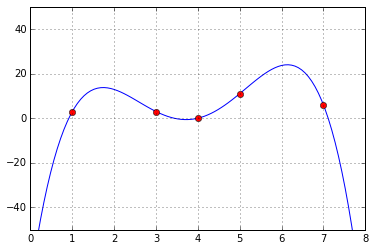

In [10]:
x_pl = linspace(0,8,101)
y_pl = Q_x(x_pl)
pyl.figure()
pyl.plot(x_pl,y_pl,x[1:6],y[1:6],'ro')
pyl.ylim(-50,50)
pyl.grid()